In [1]:
import numpy as np
import pickle
from pathlib import Path

from IPython.display import display
from lib.util_plot import *
from lib.constants import *
from lib.multilevel_analysis import *
from lib.pandas_impl import *
from lib.pandas_stats_VIS import *
from lib.matrix_analyzer import *
from lib.pandas_compute import *

import lib.FLY_preprocessing.fly_constants as FLY

### Data preparation

In [2]:
data_folder = Path.cwd() / 'data' / 'VNC'
meta_folder = data_folder / 'meta'
eval_folder = Path.cwd() / 'data' / 'eval' / 'first_run'
eval_folder.mkdir(parents=True, exist_ok=True)
plot_folder = eval_folder / "plots"
plot_folder.mkdir(parents=True, exist_ok=True)

In [3]:
filename = eval_folder / "multilevel_analysis.pkl"
with open(filename, 'rb') as file:
    multilevel_analysis = pickle.load(file)

stats = multilevel_analysis.stats
df_summary = multilevel_analysis.df_summary

In [4]:
initPlotSettings(False)

In [51]:
df_summary

model-null_group_index  \
pre_celltype pre_id_mapped post_id_mapped overlap_volume                           
-1           151           1              9                                    9   
                           130            9                                    9   
                           131            9                                    9   
                           132            9                                    9   
                           133            9                                    9   
...                                                                          ...   
 217         649           130            12                                  12   
                           132            12                                  12   
                           136            12                                  12   
                           137            12                                  12   
                           138            12                                  12   

                                                          empirical  \
pre_celltype pre_id_mapped post_id_mapped overlap_volume              
-1           151           1              9                     6.0   
                           130            9                     3.0   
                           131            9                     2.0   
                           132            9                     4.0   
                           133            9                     3.0   
...                                                             ...   
 217         649           130            12                    0.0   
                           132            12                    0.0   
                           136            12                    0.0   
                           137            12                    0.0   
                           138            12                    1.0   

                                                          model-null  \
pre_celltype pre_id_mapped post_id_mapped overlap_volume               
-1           151           1              9                 1.781522   
                           130            9                 3.759618   
                           131            9                 1.651222   
                           132            9                 4.424600   
                           133            9                 2.629598   
...                                                              ...   
 217         649           130            12                0.192090   
                           132            12                0.146893   
                           136            12                0.282486   
                           137            12                0.141243   
                           138            12                0.237288   

                                                          num_synaptic_pairs  \
pre_celltype pre_id_mapped post_id_mapped overlap_volume                       
-1           151           1              9                          44408.0   
                           130            9                          93716.0   
                           131            9                          41160.0   
                           132            9                         110292.0   
                           133            9                          65548.0   
...                                                                      ...   
 217         649           130            12                            34.0   
                           132            12                            26.0   
                           136            12                            50.0   
                           137            12                            25.0   
                           138            12                            42.0   

                                                          num_p

In [54]:
df_summary.iloc["pre_celltype"].head()

TypeError: Cannot index by location index with a non-integer key

In [69]:
row_markers = {
    "pre_celltype" : [16]
}
col_markers = {
    "post_id_mapped" : [133]
}

### Overlapping/connected matrix

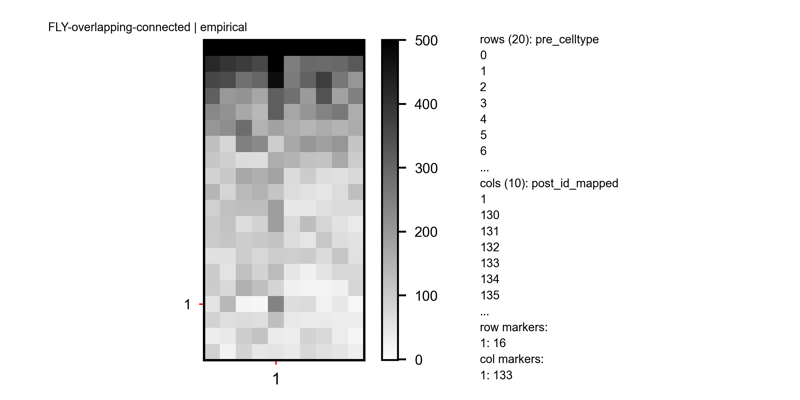

<Figure size 640x480 with 0 Axes>

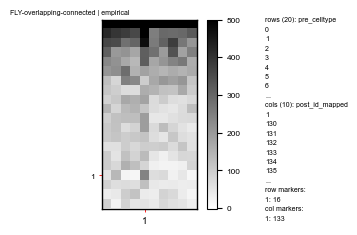

In [70]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection()
matrix_analyzer.set_data_columns(EMPIRICAL) # EMPIRICAL # MODEL_NULL # MODEL_P
matrix_analyzer.build_matrix(["pre_celltype"], 
                             ["post_id_mapped"],    
                             row_domains = np.arange(0,20).astype(int).tolist(),  
                             col_domains = None,
                             value_label_map = {},
                             aggregation_fn="sum",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("FLY-overlapping-connected", 
                              colormap_name="binary", vmin=-1, vmax=500, normalization_function=None, 
                              row_markers=row_markers, col_markers=col_markers,
                              col_separator_lines=False, row_separator_lines=False, high_res=False)

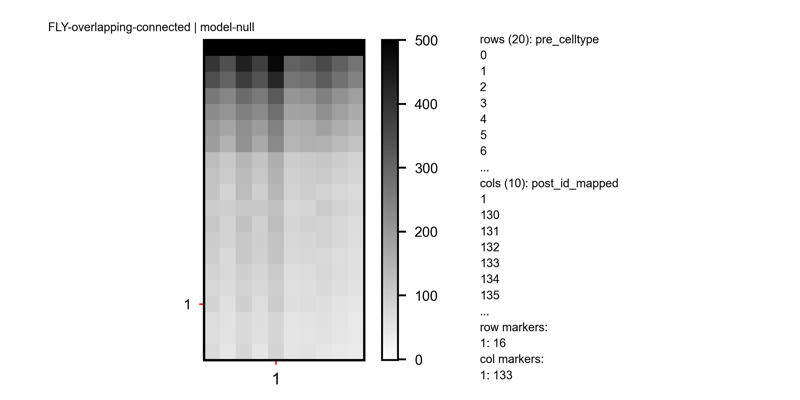

<Figure size 640x480 with 0 Axes>

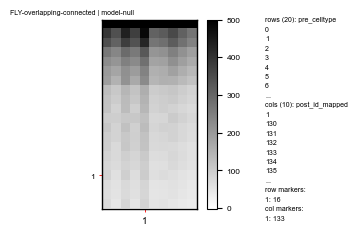

In [71]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection()
matrix_analyzer.set_data_columns(MODEL_NULL) # EMPIRICAL # MODEL_NULL # MODEL_P
matrix_analyzer.build_matrix(["pre_celltype"], 
                             ["post_id_mapped"],    
                             row_domains = np.arange(0,20).astype(int).tolist(),  
                             col_domains = None,
                             value_label_map = {},
                             aggregation_fn="sum",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("FLY-overlapping-connected", 
                              colormap_name="binary", vmin=-1, vmax=500, normalization_function=None, 
                              row_markers=row_markers, col_markers=col_markers,
                              col_separator_lines=False, row_separator_lines=False, high_res=False)

In [84]:
df_foo = df_summary.reset_index()
df_foo[df_foo.pre_celltype.isin([0,1])][["pre_celltype", "pre_id_mapped"]].value_counts()

pre_celltype  pre_id_mapped
0             114              32
              47               25
              79               25
1             39               25
0             12               25
              28               25
              32               25
              38               25
1             21               25
0             82               25
              51               25
1             33               25
0             64               25
              68               25
              2                20
1             31               20
              36               20
              37               20
              6                20
0             69               20
              99               20
              88               20
              86               20
              4                20
              53               20
              45               20
              44               20
              11               20
1             67    

### Specificity parameters matrix

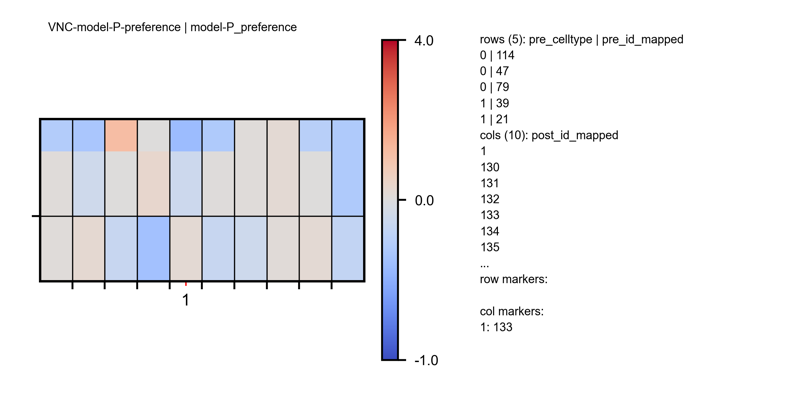

<Figure size 640x480 with 0 Axes>

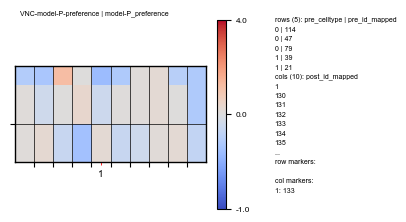

In [86]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection()
matrix_analyzer.set_data_columns("model-P_preference")
matrix_analyzer.build_matrix(["pre_celltype", "pre_id_mapped"], 
                             ["post_id_mapped"],    
                             row_domains = [(0,114),(0,47),(0,79),(1,39),(1,21)], #np.arange(0,20).astype(int).tolist(),
                             col_domains = None,
                             value_label_map = {},
                             aggregation_fn="mean",
                             default_value=-1)
matrix_analyzer.colormaps["binary"].set_under("white")
matrix_analyzer.render_matrix("VNC-model-P-preference", 
                              colormap_name="coolwarm", vmin=-1, vmax=1, normalization_function=NormalizePreferenceValue(0, 5),
                              row_markers=row_markers, col_markers=col_markers,
                              col_separator_lines=True, row_separator_lines=True, high_res=False)